In [295]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import Module, Parameter, MSELoss
import torch.optim as optim
import torch.nn.init as init
import math

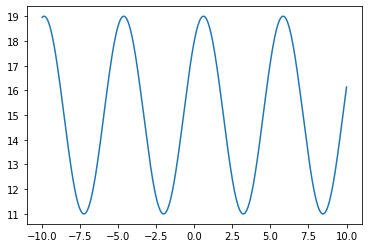

In [296]:
def true_func(x, a, b, c, d):
    return a*torch.cos(b*x + c) + d

x = torch.tensor(np.linspace(-10, 10, 1000)).float()
y = true_func(x, 4, 1.2, -7, 15).float()
plt.plot(x.numpy(), y.numpy())

In [303]:
class cosine(Module):
    def __init__(self):
        super(cosine, self).__init__()
        self.a = Parameter(torch.Tensor(1).normal_())
        self.b = Parameter(torch.Tensor(1).normal_())
        self.c = Parameter(torch.Tensor(1).normal_())
        self.d = Parameter(torch.Tensor(1).normal_())
        
    def forward(self, x):
        return self.a*torch.cos(self.b*x + self.c) + self.d

      
model = cosine()
optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = MSELoss()

In [304]:
for i in range(20000):
    optimizer.zero_grad()
    out = model(x)
    loss = criterion(out.reshape(-1, 1), y.reshape(-1, 1))
    loss.backward()
    optimizer.step()
    if i % 1000 == 0:
        print(f"Epoch {i} Loss: {loss.item():.3f}")

Epoch 0 Loss: 250.882
Epoch 1000 Loss: 0.000
Epoch 2000 Loss: 0.002
Epoch 3000 Loss: 0.000
Epoch 4000 Loss: 0.000
Epoch 5000 Loss: 0.000
Epoch 6000 Loss: 0.001
Epoch 7000 Loss: 0.000
Epoch 8000 Loss: 0.000
Epoch 9000 Loss: 0.000
Epoch 10000 Loss: 0.000
Epoch 11000 Loss: 0.000
Epoch 12000 Loss: 0.000
Epoch 13000 Loss: 0.000
Epoch 14000 Loss: 0.000
Epoch 15000 Loss: 0.000
Epoch 16000 Loss: 0.001
Epoch 17000 Loss: 0.000
Epoch 18000 Loss: 0.000
Epoch 19000 Loss: 0.000


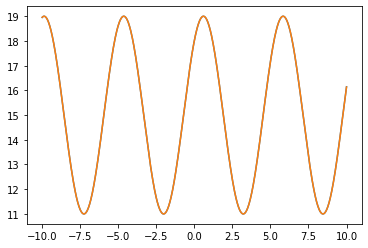

In [305]:
plt.plot(x.numpy(), model(x).detach().numpy())
plt.plot(x.numpy(), y.numpy())